In [4]:
from nodes_repository.dronescapes import DronescapesNodesImporter
from ngclib.readers import NGCNpzReader
from ngclib.utils import get_library_root
from media_processing_lib.collage_maker import collage_fn
import PIL
from io import StringIO
from omegaconf import OmegaConf
import numpy as np

dataset_path = get_library_root() / "resources/dronescapes_min"
assert dataset_path.exists(), dataset_path

In [5]:
_str = """
depthSfm:
    max_depth_meters: 300

segprop8:
    semantic_classes: [
        land,
        forest,
        residential,
        road,
        little-objects,
        water,
        sky,
        hill
    ]
    semantic_colors: [
        [0, 255, 0],
        [0, 127, 0],
        [255, 255, 0],
        [255, 255, 255],
        [255, 0, 0],
        [0, 0, 255],
        [0, 255, 255],
        [127, 127, 63]
    ]
    encoding: hard

worldNormalsSfm:
    representation: euler
"""
node_hparams = OmegaConf.to_container(OmegaConf.load(StringIO(_str)))
node_names = ["rgb", "hsv", "segprop8", "softedges", "depthSfm", "worldNormalsSfm"]
node_types = ["RGB", "HSV", "Semantic", "SoftEdges", "Depth", "Normals"]
nodes = DronescapesNodesImporter(node_names, node_types, node_hparams).nodes
reader = NGCNpzReader(dataset_path / "train_set", nodes=nodes, out_nodes=[])
assert len(reader) > 0, dataset_path

[20230521 19:53:31-NWGRAPH-WARNING] Node 'rgb' has no args. Instantiating with no args! (nodes_importer.py:_instantiate_nodes:57)
[20230521 19:53:31-NWGRAPH-WARNING] Node 'hsv' has no args. Instantiating with no args! (nodes_importer.py:_instantiate_nodes:57)
[20230521 19:53:31-NWGRAPH-WARNING] Node 'softedges' has no args. Instantiating with no args! (nodes_importer.py:_instantiate_nodes:57)
[20230521 19:53:31-NGCLIB-DGB2] Building dataset from: '/home/mihai/libs/ngclib/resources/dronescapes_min/train_set' (logger.py:_debug2:73)
[20230521 19:53:31-NGCLIB-DGB2] Nodes: [rgb (state: None, num_messages: 0, dims: (3,)), hsv (state: None, num_messages: 0, dims: (3,)), segprop8 (state: None, num_messages: 0, dims: (8,)), softedges (state: None, num_messages: 0, dims: (3,)), depthSfm (state: None, num_messages: 0, dims: (1,)), worldNormalsSfm (state: None, num_messages: 0, dims: (3,))] (logger.py:_debug2:73)
[20230521 19:53:31-NGCLIB-DGB2] GT Nodes: [] (logger.py:_debug2:73)
[20230521 19:53:3

[20230521 19:53:42-MPL-DEBUG] row_cols was not set. Setting automatically to (2, 3) based on number of images (utils.py:collage_fn:65)


rgb (240, 428, 3) float32 (240, 428, 3)
hsv (240, 428, 3) float32 (240, 428, 3)
segprop8 (240, 428) float32 (240, 428, 3)
softedges (240, 428, 1) float32 (240, 428, 3)
depthSfm (240, 428, 1) float32 (240, 428, 3)
worldNormalsSfm (240, 428, 3) float32 (240, 428, 3)


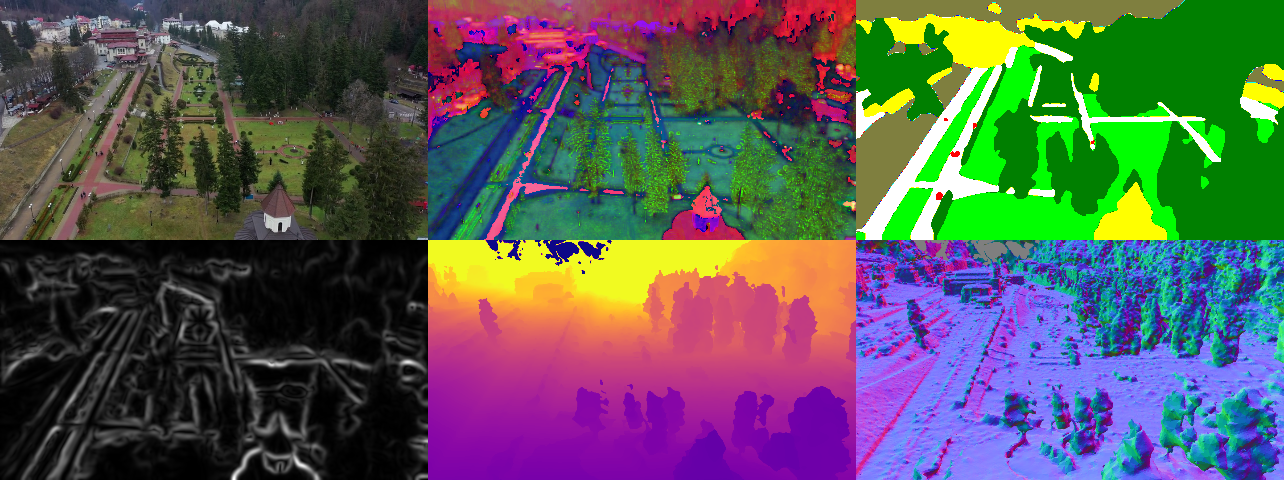

In [9]:
ix = np.random.randint(0, len(reader))
items = reader[ix]["data"]
assert len(items) > 0

res = []
for key in items.keys():
    img = reader.name_to_node[key].plot_fn(items[key])
    res.append(img)
    print(key, items[key].shape, items[key].dtype, img.shape)
collage = collage_fn(res)
display(PIL.Image.fromarray(collage))